In [1]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras_preprocessing.image import load_img
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):  
        img = load_img(image, color_mode = 'grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\pravi\OneDrive\Desktop\ai2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


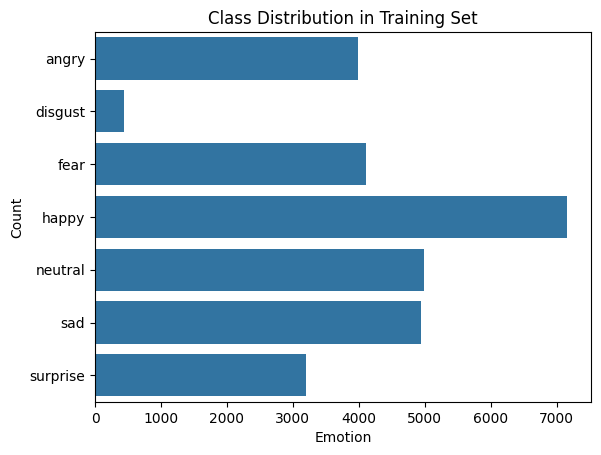

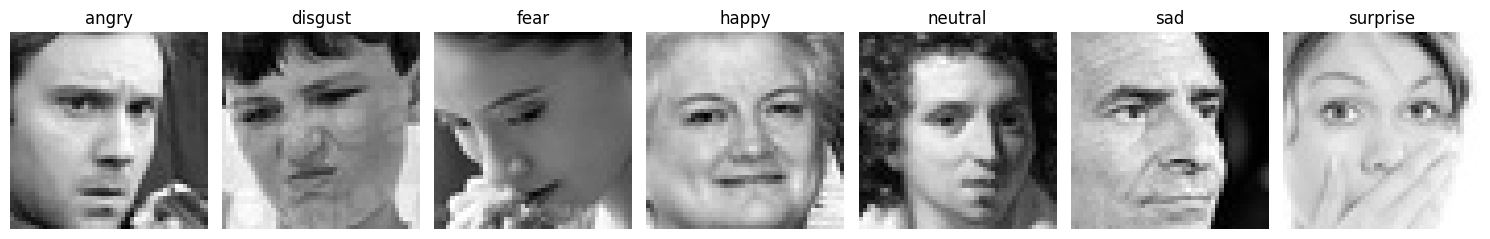

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(train['label'])
plt.title('Class Distribution in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# Visualizing a few sample images
fig, axes = plt.subplots(1, 7, figsize=(15, 5))
for i, label in enumerate(train['label'].unique()):
    img_path = train[train['label'] == label]['image'].iloc[0]
    img = load_img(img_path, color_mode='grayscale')
    axes[i].imshow(np.array(img), cmap='gray')
    axes[i].set_title(label)
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 173s 765ms/step - accuracy: 0.8517 - loss: 0.4351 - val_accuracy: 0.6360 - val_loss: 1.1986
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 168s 745ms/step - accuracy: 0.8562 - loss: 0.4271 - val_accuracy: 0.6347 - val_loss: 1.1923
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 169s 746ms/step - accuracy: 0.8555 - loss: 0.4207 - val_accuracy: 0.6330 - val_loss: 1.2091
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 761ms/step - accuracy: 0.8617 - loss: 0.4207 - val_accuracy: 0.6333 - val_loss: 1.2271
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 168s 741ms/step - accuracy: 0.8484 - loss: 0.4416 - val_accuracy: 0.6319 - val_loss: 1.2219
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 169s 750ms/step - accuracy: 0.8494 - loss: 0.4452 - val_accuracy: 0.6322 - val_loss: 1.1836
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 165s 730ms/step - accuracy: 0.8581 - loss: 0.4178 - val_accuracy: 0.6327 - val_loss: 1.1955
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 168s 745ms/step - accuracy: 

In [31]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model weights and architecture in HDF5 format
model.save("emotiondetector.h5")


In [32]:
from keras.models import model_from_json

In [33]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [34]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [35]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [36]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\pravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
model prediction is  sad


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  sad


C:\Users\pravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


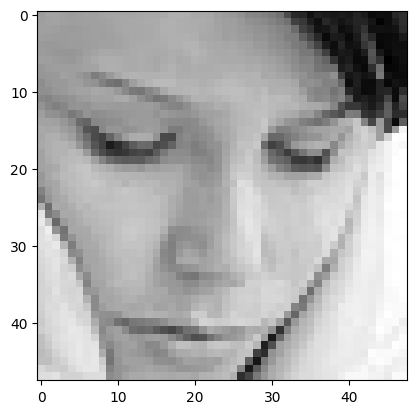

In [38]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  sad


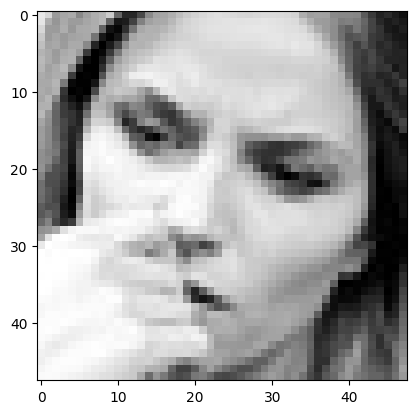

In [39]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  disgust


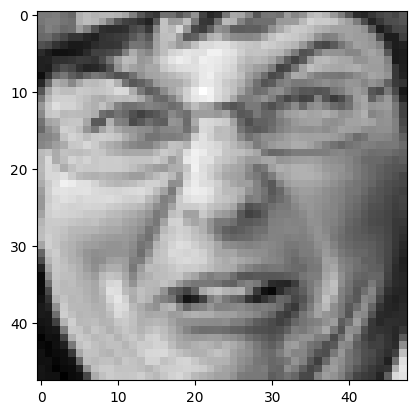

In [40]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  happy


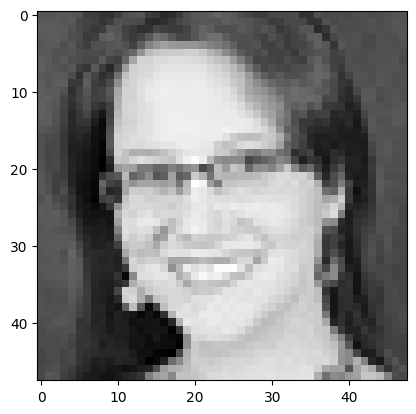

In [41]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is  surprise


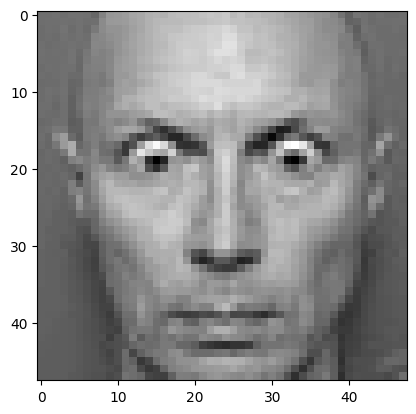

In [42]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')